## Python

In [ ]:
# import squidpy as sq
import scanpy as sc
import numpy as np
import pandas as pd
import spatialdata

In [3]:
adata = sc.read_h5ad("Rep2/annotated.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 46355 × 109
    obs: 'region', 'Name', 'x', 'y', 'area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_FP', 'log1p_total_counts_FP', 'pct_counts_FP', 'n_genes', 'n_counts', 'leiden', 'leiden_R', 'cell_type'
    var: 'FP', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cell_type_colors', 'cosg_leiden', 'leiden', 'leiden_R', 'leiden_R_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatialdata_attrs', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts', 'counts_corrected', 'norm'
    obsp: 'connectivities', 'distances'

In [5]:
adata = adata[adata.obs['area'] > 600].copy()
adata

AnnData object with n_obs × n_vars = 45870 × 109
    obs: 'region', 'Name', 'x', 'y', 'area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_FP', 'log1p_total_counts_FP', 'pct_counts_FP', 'n_genes', 'n_counts', 'leiden', 'leiden_R', 'cell_type'
    var: 'FP', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cell_type_colors', 'cosg_leiden', 'leiden', 'leiden_R', 'leiden_R_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatialdata_attrs', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts', 'counts_corrected', 'norm'
    obsp: 'connectivities', 'distances'

In [6]:
matrix = adata.to_df(layer='counts_corrected')

In [7]:
matrix["x"] = adata.obs["x"]
matrix["y"] = adata.obs["y"]

In [8]:
matrix.to_csv("./forMoranFast_Rep2.csv")

## R

In [1]:
library(moranfast)

In [2]:
library(BiocParallel)

In [3]:
items <- read.table("forMoranFast_Rep2.csv", sep = ",", header = TRUE)
items

X,Adcy1,Adora2a,Agt,Aqp4,Atp2b4,Baiap3,Bcl11a,Bcl11b,C1ql3,⋯,Tmem212,Tmem88b,Trh,Vip,Vtn,Vxn,Zeb2,Zfpm2,x,y
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.0,0,0,3,0,0,0,0,0,⋯,0,0,0,0,3,0,0,2,3043.628,801.3796
4,0.0,0,0,2,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,2783.434,804.8311
5,0.0,0,3,1,0,0,0,0,0,⋯,0,0,0,0,1,0,0,2,3015.837,805.9940
6,1.5,0,0,1,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,2750.580,812.4583
7,1.5,0,0,6,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,2830.038,819.0240
9,0.0,0,0,2,0,0,0,0,0,⋯,0,0,0,0,0,0,6,0,3081.378,820.8087
11,3.0,0,0,5,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,3212.641,826.7397
13,0.0,0,0,5,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,2551.636,826.9440
14,0.0,2,0,6,0,0,0,0,0,⋯,0,0,0,0,2,0,0,0,2698.406,830.8085


In [6]:
gene_list = colnames(items)[2:110]

In [7]:
gene_list

[1] "Adcy1"    "Adora2a"  "Agt"      "Aqp4"     "Atp2b4"   "Baiap3"  
  [7] "Bcl11a"   "Bcl11b"   "C1ql3"    "Cadps2"   "Calb1"    "Cbln1"   
 [13] "Ccdc153"  "Cck"      "Cit"      "Cldn5"    "Cplx2"    "Cplx3"   
 [19] "Cpne4"    "Cpne7"    "Csf1r"    "Cspg4"    "Ctss"     "Dcn"     
 [25] "Dlk1"     "Dner"     "Drd1"     "Drd2"     "Ecrg4"    "Elavl2"  
 [31] "Enpp2"    "Ermn"     "Etv1"     "Fezf2"    "Fgf13"    "Flt1"    
 [37] "Fn1"      "Foxj1"    "Gabra1"   "Gad1"     "Gad2"     "Gpr17"   
 [43] "Gpr88"    "Grm3"     "Grm8"     "Hap1"     "Hs3st2"   "Htr2c"   
 [49] "Igf2"     "Il17ra"   "Kcnip2"   "Lamp5"    "Lmo3"     "Lypd1"   
 [55] "Meis2"    "Mog"      "Mpped1"   "Mrc1"     "Nfib"     "Nptxr"   
 [61] "Nrn1"     "Ntng1"    "Nxph1"    "Nxph3"    "Otp"      "P2ry12"  
 [67] "Pdgfra"   "Pdgfrb"   "Pdyn"     "Pdzrn3"   "Penk"     "Pltp"    
 [73] "Prkcg"    "Prox1"    "Ptprt"    "Pvalb"    "Rasgrp1"  "Rasl10a" 
 [79] "Rax"      "Reln"     "Rgs5"     "Rprm"     "Rspo2"    "Satb2"   
 [85] "Shisa6"   "Shox2"    "Slc17a6"  "Slc17a7"  "Slc1a3"   "Slc24a3" 
 [91] "Slc32a1"  "Slc6a20a" "Slco1a4"  "Slit3"    "Sst"      "Synpo2"  
 [97] "Synpr"    "Tafa2"    "Tagln"    "Tcf7l2"   "Thy1"     "Tmem212" 
[103] "Tmem88b"  "Trh"      "Vip"      "Vtn"      "Vxn"      "Zeb2"    
[109] "Zfpm2"

In [8]:
register(MulticoreParam(workers = 64))

moran_df <- bplapply(gene_list, function(g) {
  mi <- moranfast(items[,g], items$x, items$y)
  data.frame(gene = g, moranIndex = mi$observed)
})

# 停止并行计算
bpstop()

In [9]:
new_df = c()
for (df in moran_df){
    new_df = rbind(new_df, df)
}
new_df

gene,moranIndex
<chr>,<dbl>
Adcy1,0.087752343
Adora2a,0.048038199
Agt,0.072906281
Aqp4,0.024793037
Atp2b4,0.049939841
Baiap3,0.083489238
Bcl11a,0.056479451
Bcl11b,0.046357479
C1ql3,0.033450335


In [10]:
column_values <- new_df$moranIndex

In [11]:
write.table(new_df, file = "./moranIndex_Rep2.csv", row.names = FALSE, sep = ",")

## Python

In [1]:
import pandas as pd

In [3]:
df1 = pd.read_csv('moranIndex_Rep2.csv', index_col=0)
df1

,moranIndex
gene,
Adcy1,0.087752
Adora2a,0.048038
Agt,0.072906
Aqp4,0.024793
Atp2b4,0.049940
...,...
Vip,0.001939
Vtn,0.009012
Vxn,0.076226


In [5]:
df2 = pd.read_csv("../ABA110_Demo//moranIndex_VisiumHD.csv", index_col=0)
df2

,moranIndex
gene,
Cck,0.016522
Rgs5,0.000550
P2ry12,0.000237
Cbln1,0.019689
Fn1,0.001337
...,...
Hs3st2,0.002112
Prkcg,0.003304
Gpr88,0.013616


In [7]:
df1 = df1.loc[df2.index,:].copy()

In [8]:
df1.to_csv('moranIndex_Rep2.csv')

In [33]:
import scanpy as sc

In [34]:
adata = sc.read_h5ad("/media/duan/DuanLab_Data/openFISH/10xData/VisiumHD/square_008um_norm.h5ad")
adata

AnnData object with n_obs × n_vars = 378574 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

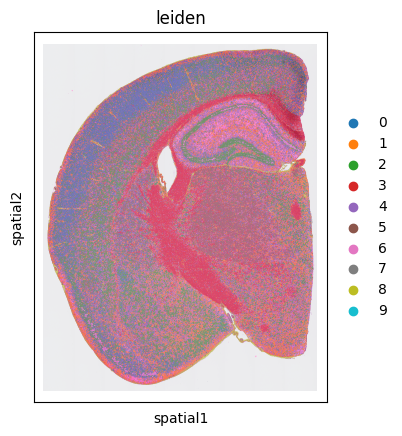

In [35]:
sc.pl.spatial(adata, color = 'leiden')

In [36]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv("/media/duan/DuanLab_Data/openFISH/ABA110_Demo/NP_Fold_V58.csv")
df

,Gene,Fold,Pad
0,Cck,3.0,810_Xu2008_PNAS_30bp_seq8064_AT
1,Rgs5,1.0,810_Xu2008_PNAS_30bp_seq5099
2,P2ry12,1.0,Pad_240704_2450
3,Cbln1,1.0,Pad_240704_19705
4,Fn1,1.0,Pad_240704_21863
...,...,...,...
105,Hs3st2,1.0,Pad_240704_25115
106,Prkcg,1.0,Pad_240704_34398
107,Gpr88,1.5,Pad_240704_27333
108,Vip,2.0,Pad_240704_18918


In [38]:
adata = adata[:,[x for x in df['Gene'].tolist() if x != 'sFP']].copy()

In [39]:
adata

AnnData object with n_obs × n_vars = 378574 × 109
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [12]:
matrix = adata.to_df()

In [15]:
matrix["x"] = adata.obs["array_row"]
matrix["y"] = adata.obs["array_col"]

In [16]:
matrix.to_csv("./forMoranFast_VisiumHD.csv")

## R

In [3]:
items <- read.table("/media/duan/DuanLab_Data/openFISH/ABA110_Demo/forMoranFast_VisiumHD.csv", sep = ",", header = TRUE)
items

X,Cck,Rgs5,P2ry12,Cbln1,Fn1,Dner,Pltp,Grm3,Synpr,⋯,Rasl10a,Cadps2,Pdyn,Hs3st2,Prkcg,Gpr88,Vip,Nxph1,x,y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
s_008um_00301_00321-1,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.000000,⋯,0.0000000,0,0,0,0,0,0,0.0000000,301,321
s_008um_00602_00290-1,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.000000,⋯,0.0000000,0,0,0,0,0,0,0.0000000,602,290
s_008um_00515_00112-1,0.0000000,0,0.0000000,0,0,0.3092371,0.0000000,0.0000000,0.000000,⋯,0.0000000,0,0,0,0,0,0,0.0000000,515,112
s_008um_00383_00696-1,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.000000,⋯,0.0000000,0,0,0,0,0,0,0.0000000,383,696
s_008um_00526_00291-1,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.000000,⋯,0.0000000,0,0,0,0,0,0,0.0000000,526,291
s_008um_00681_00396-1,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.000000,⋯,0.0000000,0,0,0,0,0,0,0.0000000,681,396
s_008um_00078_00444-1,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.000000,⋯,0.0000000,0,0,0,0,0,0,0.0000000,78,444
s_008um_00128_00278-1,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.000000,⋯,0.0000000,0,0,0,0,0,0,0.0000000,128,278
s_008um_00123_00164-1,0.0000000,0,0.0000000,0,0,0.0000000,0.0000000,0.0000000,0.000000,⋯,0.3807236,0,0,0,0,0,0,0.0000000,123,164


In [4]:
gene_list = colnames(items)[2:110]

In [5]:
gene_list

[1] "Cck"      "Rgs5"     "P2ry12"   "Cbln1"    "Fn1"      "Dner"    
  [7] "Pltp"     "Grm3"     "Synpr"    "Nfib"     "Satb2"    "Pdgfra"  
 [13] "Bcl11b"   "Shox2"    "Zfpm2"    "Otp"      "Gpr17"    "Mrc1"    
 [19] "Nptxr"    "Agt"      "Pdzrn3"   "Shisa6"   "Sst"      "Ctss"    
 [25] "Tcf7l2"   "Cplx2"    "Ntng1"    "Cldn5"    "Mpped1"   "Cspg4"   
 [31] "Pdgfrb"   "Atp2b4"   "C1ql3"    "Slc24a3"  "Zeb2"     "Slc17a6" 
 [37] "Lmo3"     "Gad2"     "Ecrg4"    "Aqp4"     "Enpp2"    "Nxph3"   
 [43] "Fgf13"    "Penk"     "Etv1"     "Hap1"     "Pvalb"    "Csf1r"   
 [49] "Meis2"    "Rspo2"    "Slc1a3"   "Htr2c"    "Slc32a1"  "Nrn1"    
 [55] "Dcn"      "Slit3"    "Ptprt"    "Vxn"      "Prox1"    "Slco1a4" 
 [61] "Rax"      "Slc17a7"  "Tmem212"  "Flt1"     "Drd1"     "Cplx3"   
 [67] "Gad1"     "Tagln"    "Vtn"      "Reln"     "Ermn"     "Cpne4"   
 [73] "Foxj1"    "Kcnip2"   "Il17ra"   "Grm8"     "Gabra1"   "Adora2a" 
 [79] "Calb1"    "Adcy1"    "Elavl2"   "Slc6a20a" "Rprm"     "Ccdc153" 
 [85] "Bcl11a"   "Drd2"     "Lypd1"    "Fezf2"    "Cit"      "Lamp5"   
 [91] "Trh"      "Rasgrp1"  "Thy1"     "Dlk1"     "Igf2"     "Cpne7"   
 [97] "Tafa2"    "Baiap3"   "Mog"      "Tmem88b"  "Synpo2"   "Rasl10a" 
[103] "Cadps2"   "Pdyn"     "Hs3st2"   "Prkcg"    "Gpr88"    "Vip"     
[109] "Nxph1"

In [6]:
register(MulticoreParam(workers = 64))

moran_df <- bplapply(gene_list, function(g) {
  mi <- moranfast(items[,g], items$x, items$y)
  data.frame(gene = g, moranIndex = mi$observed)
})

# 停止并行计算
bpstop()

In [7]:
new_df = c()
for (df in moran_df){
    new_df = rbind(new_df, df)
}
new_df

gene,moranIndex
<chr>,<dbl>
Cck,1.652245e-02
Rgs5,5.501697e-04
P2ry12,2.366595e-04
Cbln1,1.968901e-02
Fn1,1.336661e-03
Dner,1.607757e-03
Pltp,8.889666e-04
Grm3,1.512308e-03
Synpr,6.816426e-03


In [8]:
column_values <- new_df$moranIndex

In [9]:
write.table(new_df, file = "./moranIndex_VisiumHD.csv", row.names = FALSE, sep = ",")

In [1]:
import scanpy as sc

In [34]:
adata = sc.read_h5ad("/media/duan/DuanLab_Data/openFISH/10xData/VisiumHD/square_008um_norm.h5ad")
adata

AnnData object with n_obs × n_vars = 378574 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

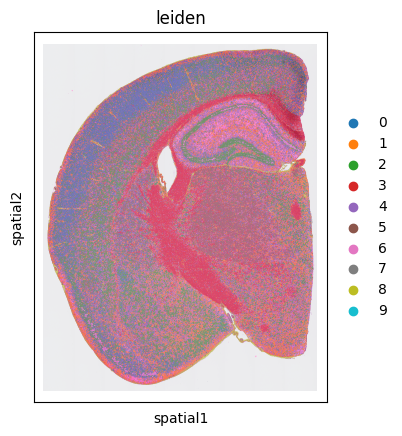

In [35]:
sc.pl.spatial(adata, color = 'leiden')

In [2]:
import squidpy as sq

In [42]:
sq.gr.spatial_neighbors(adata, n_neighs=8, coord_type = 'grid')

In [43]:
VisiumHD_C_df = sq.gr.spatial_autocorr(adata, connectivity_key='spatial_connectivities', genes=list(adata.var_names), 
                       mode='geary', transformation=True, n_jobs=64, backend='loky', show_progress_bar=True,
                      copy = True)

In [44]:
VisiumHD_C_df.to_csv("Visium_HD_GearyC.csv")

In [45]:
VisiumHD_C_df

,C,pval_norm,var_norm,pval_norm_fdr_bh
Penk,0.579011,0.000000e+00,6.890313e-07,0.000000e+00
Sst,0.736446,0.000000e+00,6.890313e-07,0.000000e+00
Vip,0.737578,0.000000e+00,6.890313e-07,0.000000e+00
Tagln,0.762813,0.000000e+00,6.890313e-07,0.000000e+00
Igf2,0.785091,0.000000e+00,6.890313e-07,0.000000e+00
...,...,...,...,...
Fezf2,0.991211,1.689335e-26,6.890313e-07,1.753690e-26
Zfpm2,0.991444,3.242009e-25,6.890313e-07,3.333764e-25
Slit3,0.992107,9.673891e-22,6.890313e-07,9.854711e-22
Cspg4,0.992258,5.424010e-21,6.890313e-07,5.474232e-21


In [3]:
adata = sc.read_h5ad("./Rep2/annotated.h5ad")

In [4]:
adata = adata[adata.obs['area'] > 600].copy()
adata

AnnData object with n_obs × n_vars = 45870 × 109
    obs: 'region', 'Name', 'x', 'y', 'area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_FP', 'log1p_total_counts_FP', 'pct_counts_FP', 'n_genes', 'n_counts', 'leiden', 'leiden_R', 'cell_type'
    var: 'FP', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cell_type_colors', 'cosg_leiden', 'leiden', 'leiden_R', 'leiden_R_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatialdata_attrs', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts', 'counts_corrected', 'norm'
    obsp: 'connectivities', 'distances'

In [5]:
sq.gr.spatial_neighbors(adata, radius=50, coord_type = 'generic')

In [6]:
OpenFISH_C_df = sq.gr.spatial_autocorr(adata, connectivity_key='spatial_connectivities', genes=list(adata.var_names), 
                       mode='geary', transformation=True, n_jobs=64, backend='loky', show_progress_bar=True,
                      copy = True)

In [7]:
OpenFISH_C_df

,C,pval_norm,var_norm,pval_norm_fdr_bh
Slc17a7,0.317982,0.000000e+00,0.000045,0.000000e+00
Igf2,0.350615,0.000000e+00,0.000045,0.000000e+00
Hap1,0.385768,0.000000e+00,0.000045,0.000000e+00
Gpr88,0.413542,0.000000e+00,0.000045,0.000000e+00
Synpo2,0.422214,0.000000e+00,0.000045,0.000000e+00
...,...,...,...,...
Slco1a4,0.820236,2.576240e-158,0.000045,2.674383e-158
Il17ra,0.834132,3.955088e-135,0.000045,4.067024e-135
Mpped1,0.858079,1.554464e-99,0.000045,1.583519e-99
Tagln,0.930413,1.740177e-25,0.000045,1.756289e-25


In [8]:
OpenFISH_C_df.to_csv("Rep2_GearyC.csv")

In [10]:
import pandas as pd

In [12]:
VisiumHD_C_df = pd.read_csv("../ABA110_Demo/Visium_HD_GearyC.csv", index_col=0)
VisiumHD_C_df

,C,pval_norm,var_norm,pval_norm_fdr_bh
Penk,0.579011,0.000000e+00,6.890313e-07,0.000000e+00
Sst,0.736446,0.000000e+00,6.890313e-07,0.000000e+00
Vip,0.737578,0.000000e+00,6.890313e-07,0.000000e+00
Tagln,0.762813,0.000000e+00,6.890313e-07,0.000000e+00
Igf2,0.785091,0.000000e+00,6.890313e-07,0.000000e+00
...,...,...,...,...
Fezf2,0.991211,1.689335e-26,6.890313e-07,1.753690e-26
Zfpm2,0.991444,3.242009e-25,6.890313e-07,3.333764e-25
Slit3,0.992107,9.673891e-22,6.890313e-07,9.854711e-22
Cspg4,0.992258,5.424010e-21,6.890313e-07,5.474232e-21


In [14]:
OpenFISH_C_df.loc[VisiumHD_C_df.index,:].to_csv("Rep2_GearyC.csv")

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
merfish = sc.read_h5ad("/media/duan/DuanLab_Data/Yao2023/MERFISH_ABCA1_halfCoronal_079.h5ad")
merfish

AnnData object with n_obs × n_vars = 31982 × 1122
    obs: 'brain_section_label_x', 'z_x', 'brain_section_label_y', 'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex', 'cluster_alias', 'x', 'y', 'z_y', 'subclass_confidence_score', 'cluster_confidence_score', 'high_quality_transfer', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color'
    var: 'gene_symbol_y', 'name', 'mapped_ncbi_identifier', 'gene_identifier'
    uns: 'class_colors', 'cluster_colors', 'neurotransmitter_colors', 'subclass_colors', 'supertype_colors'
    obsm: 'spatial'

In [51]:
xenium = sc.read_h5ad("/media/duan/DuanLab_Data/openFISH/10xData/XeniumFFPE/Xenium_MENDER.h5ad")
xenium

AnnData object with n_obs × n_vars = 130557 × 248
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'MENDER'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'MENDER_colors', 'cosg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'ct0', 'ct1', 'ct10', 'ct11', 'ct12', 'ct13', 'ct14', 'ct15', 'ct16', 'ct17', 'ct18', 'ct19', 'ct2', 'ct20', 'ct21', 'ct22', 'ct23', 'ct24', 'ct25', 'ct26', 'ct27', 'ct28', 'ct29', 'ct3', 'ct30', 'ct31', 'ct32', 'ct33', 'ct34', 'ct35', 'c

In [55]:
xeniumprime = sc.read_10x_h5("/media/duan/DuanLab_Data/openFISH/10xData/XeniumPrime5K/cell_feature_matrix.h5")
xeniumprime

AnnData object with n_obs × n_vars = 63173 × 5006
    var: 'gene_ids', 'feature_types', 'genome'

In [62]:
starmap = sc.read_h5ad("/media/duan/DuanLab_Data/openFISH/ABA60/STARmapPLUS/STARmap_Shi2022Spatial_well11_data.h5ad")
starmap

AnnData object with n_obs × n_vars = 43341 × 1022
    obs: 'NAME', 'X', 'Y', 'Main_molecular_cell_type', 'Sub_molecular_cell_type', 'Main_molecular_tissue_region', 'Sub_molecular_tissue_region', 'Molecular_spatial_cell_type', 'slice_id', 'Z', 'leiden'
    uns: 'leiden', 'leiden_colors', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [2]:
openFISH = sc.read_h5ad("Rep2/annotated.h5ad")
openFISH

AnnData object with n_obs × n_vars = 46355 × 109
    obs: 'region', 'Name', 'x', 'y', 'area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_FP', 'log1p_total_counts_FP', 'pct_counts_FP', 'n_genes', 'n_counts', 'leiden', 'leiden_R', 'cell_type'
    var: 'FP', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cell_type_colors', 'cosg_leiden', 'leiden', 'leiden_R', 'leiden_R_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatialdata_attrs', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts', 'counts_corrected', 'norm'
    obsp: 'connectivities', 'distances'

In [3]:
openFISH = openFISH[openFISH.obs['area'] > 600].copy()
openFISH

AnnData object with n_obs × n_vars = 45870 × 109
    obs: 'region', 'Name', 'x', 'y', 'area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_FP', 'log1p_total_counts_FP', 'pct_counts_FP', 'n_genes', 'n_counts', 'leiden', 'leiden_R', 'cell_type'
    var: 'FP', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cell_type_colors', 'cosg_leiden', 'leiden', 'leiden_R', 'leiden_R_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatialdata_attrs', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts', 'counts_corrected', 'norm'
    obsp: 'connectivities', 'distances'

In [48]:
scref = sc.read_h5ad("/media/duan/DuanLab_Data/openFISH/Panel_Design/Brain20240802/ABA_raw_tight.h5ad")
scref

AnnData object with n_obs × n_vars = 87333 × 32285
    obs: 'cell_barcode_x', 'library_label_x', 'anatomical_division_label', 'cell_barcode_y', 'barcoded_cell_sample_label', 'library_label_y', 'feature_matrix_label', 'entity', 'brain_section_label', 'library_method', 'region_of_interest_acronym', 'donor_label', 'donor_genotype', 'donor_sex', 'dataset_label', 'x', 'y', 'cluster_alias', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'region_of_interest_order', 'region_of_interest_color', 'CellType', 'batch'
    var: 'gene_symbol_y', 'name', 'mapped_ncbi_identifier', 'comment', 'gene_identifier'
    uns: 'CellType_colors', 'class_colors'
    obsm: 'X_umap'
    layers: 'counts'

In [12]:
consensus_genes = []

for x in openFISH.var_names:
    if x in merfish.var_names and \
    x in xenium.var_names and \
    x in xeniumprime.var_names and \
    x.upper() in starmap.var_names:
        consensus_genes.append(x)

In [13]:
consensus_genes

['Aqp4',
 'Bcl11b',
 'Calb1',
 'Cbln1',
 'Cplx3',
 'Fezf2',
 'Fn1',
 'Gad2',
 'Hs3st2',
 'Igf2',
 'Lamp5',
 'Meis2',
 'Pdyn',
 'Prox1',
 'Pvalb',
 'Satb2',
 'Slc17a6',
 'Slc17a7']

In [4]:
mutual_genes = ['Aqp4', 'Slc17a7', 'Gad2', 'Igf2', 'Slc17a6']

In [5]:
import itertools

In [6]:
combinations = list(itertools.combinations(mutual_genes, 2))
combinations

[('Aqp4', 'Slc17a7'),
 ('Aqp4', 'Gad2'),
 ('Aqp4', 'Igf2'),
 ('Aqp4', 'Slc17a6'),
 ('Slc17a7', 'Gad2'),
 ('Slc17a7', 'Igf2'),
 ('Slc17a7', 'Slc17a6'),
 ('Gad2', 'Igf2'),
 ('Gad2', 'Slc17a6'),
 ('Igf2', 'Slc17a6')]

In [17]:
len(combinations)

10

In [25]:
scref

AnnData object with n_obs × n_vars = 87333 × 32285
    obs: 'cell_barcode_x', 'library_label_x', 'anatomical_division_label', 'cell_barcode_y', 'barcoded_cell_sample_label', 'library_label_y', 'feature_matrix_label', 'entity', 'brain_section_label', 'library_method', 'region_of_interest_acronym', 'donor_label', 'donor_genotype', 'donor_sex', 'dataset_label', 'x', 'y', 'cluster_alias', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'region_of_interest_order', 'region_of_interest_color', 'CellType', 'batch'
    var: 'gene_symbol_y', 'name', 'mapped_ncbi_identifier', 'comment', 'gene_identifier'
    uns: 'CellType_colors', 'class_colors'
    obsm: 'X_umap'
    layers: 'counts'

In [68]:
df = scref.to_df()
for i, (g1,g2) in enumerate(combinations):
    tmp = df.loc[:, [g1, g2]].copy()
    tmp = tmp[tmp[g1] + tmp[g2] > 0]
    correlation = tmp.corr(method='pearson').iloc[0, 1]
    final_df.iloc[i, 0] = correlation

In [69]:
final_df

,scRNA-seq,MERFISH,Xenium,XeniumPrime,STARmapPLUS,OpenFISH
"(Aqp4, Slc17a7)",-0.156205,-0.087764,-0.087053,-0.096631,NaN,NaN
"(Aqp4, Gad2)",-0.167309,-0.048689,-0.04985,-0.047923,NaN,NaN
"(Aqp4, Igf2)",-0.194949,0.020165,0.061306,0.126298,NaN,NaN
"(Aqp4, Scl17a6)",-0.194761,-0.055623,0.035591,-0.047313,NaN,NaN
"(Slc17a7, Gad2)",-0.224882,-0.068076,-0.108327,-0.126138,NaN,NaN
"(Slc17a7, Igf2)",-0.130961,-0.066441,-0.132225,-0.082562,NaN,NaN
"(Slc17a7, Scl17a6)",-0.191491,0.018551,0.040095,0.06006,NaN,NaN
"(Gad2, Igf2)",-0.143722,-0.039373,-0.067248,-0.041538,NaN,NaN
"(Gad2, Scl17a6)",-0.219395,-0.038795,-0.088139,-0.050469,NaN,NaN
"(Igf2, Scl17a6)",-0.169953,-0.042637,-0.075282,-0.044746,NaN,NaN


In [18]:
merfish

AnnData object with n_obs × n_vars = 31982 × 1122
    obs: 'brain_section_label_x', 'z_x', 'brain_section_label_y', 'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex', 'cluster_alias', 'x', 'y', 'z_y', 'subclass_confidence_score', 'cluster_confidence_score', 'high_quality_transfer', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color'
    var: 'gene_symbol_y', 'name', 'mapped_ncbi_identifier', 'gene_identifier'
    uns: 'class_colors', 'cluster_colors', 'neurotransmitter_colors', 'subclass_colors', 'supertype_colors'
    obsm: 'spatial'

In [70]:
df = merfish.to_df()
for i, (g1,g2) in enumerate(combinations):
    tmp = df.loc[:, [g1, g2]].copy()
    tmp = tmp[tmp[g1] + tmp[g2] > 0]
    correlation = tmp.corr(method='pearson').iloc[0, 1]
    final_df.iloc[i, 1] = correlation

In [71]:
final_df

,scRNA-seq,MERFISH,Xenium,XeniumPrime,STARmapPLUS,OpenFISH
"(Aqp4, Slc17a7)",-0.156205,-0.243518,-0.087053,-0.096631,NaN,NaN
"(Aqp4, Gad2)",-0.167309,-0.242494,-0.04985,-0.047923,NaN,NaN
"(Aqp4, Igf2)",-0.194949,-0.167265,0.061306,0.126298,NaN,NaN
"(Aqp4, Scl17a6)",-0.194761,-0.284615,0.035591,-0.047313,NaN,NaN
"(Slc17a7, Gad2)",-0.224882,-0.192474,-0.108327,-0.126138,NaN,NaN
"(Slc17a7, Igf2)",-0.130961,-0.177235,-0.132225,-0.082562,NaN,NaN
"(Slc17a7, Scl17a6)",-0.191491,-0.145823,0.040095,0.06006,NaN,NaN
"(Gad2, Igf2)",-0.143722,-0.198613,-0.067248,-0.041538,NaN,NaN
"(Gad2, Scl17a6)",-0.219395,-0.234293,-0.088139,-0.050469,NaN,NaN
"(Igf2, Scl17a6)",-0.169953,-0.240298,-0.075282,-0.044746,NaN,NaN


In [49]:
xenium

AnnData object with n_obs × n_vars = 130557 × 248
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'MENDER'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'MENDER_colors', 'cosg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'ct0', 'ct1', 'ct10', 'ct11', 'ct12', 'ct13', 'ct14', 'ct15', 'ct16', 'ct17', 'ct18', 'ct19', 'ct2', 'ct20', 'ct21', 'ct22', 'ct23', 'ct24', 'ct25', 'ct26', 'ct27', 'ct28', 'ct29', 'ct3', 'ct30', 'ct31', 'ct32', 'ct33', 'ct34', 'ct35', 'c

In [72]:
df = xenium.to_df(layer='counts')
for i, (g1,g2) in enumerate(combinations):
    tmp = df.loc[:, [g1, g2]].copy()
    tmp = tmp[tmp[g1] + tmp[g2] > 0]
    correlation = tmp.corr(method='pearson').iloc[0, 1]
    final_df.iloc[i, 2] = correlation

In [73]:
final_df

,scRNA-seq,MERFISH,Xenium,XeniumPrime,STARmapPLUS,OpenFISH
"(Aqp4, Slc17a7)",-0.156205,-0.243518,-0.163443,-0.096631,NaN,NaN
"(Aqp4, Gad2)",-0.167309,-0.242494,-0.136499,-0.047923,NaN,NaN
"(Aqp4, Igf2)",-0.194949,-0.167265,-0.011988,0.126298,NaN,NaN
"(Aqp4, Scl17a6)",-0.194761,-0.284615,-0.052973,-0.047313,NaN,NaN
"(Slc17a7, Gad2)",-0.224882,-0.192474,-0.187542,-0.126138,NaN,NaN
"(Slc17a7, Igf2)",-0.130961,-0.177235,-0.215543,-0.082562,NaN,NaN
"(Slc17a7, Scl17a6)",-0.191491,-0.145823,-0.050126,0.06006,NaN,NaN
"(Gad2, Igf2)",-0.143722,-0.198613,-0.193573,-0.041538,NaN,NaN
"(Gad2, Scl17a6)",-0.219395,-0.234293,-0.198465,-0.050469,NaN,NaN
"(Igf2, Scl17a6)",-0.169953,-0.240298,-0.188656,-0.044746,NaN,NaN


In [52]:
xeniumprime

AnnData object with n_obs × n_vars = 63173 × 5006
    var: 'gene_ids', 'feature_types', 'genome'

In [74]:
df = xeniumprime.to_df()
for i, (g1,g2) in enumerate(combinations):
    tmp = df.loc[:, [g1, g2]].copy()
    tmp = tmp[tmp[g1] + tmp[g2] > 0]
    correlation = tmp.corr(method='pearson').iloc[0, 1]
    final_df.iloc[i, 3] = correlation

In [75]:
final_df

,scRNA-seq,MERFISH,Xenium,XeniumPrime,STARmapPLUS,OpenFISH
"(Aqp4, Slc17a7)",-0.156205,-0.243518,-0.163443,-0.210728,NaN,NaN
"(Aqp4, Gad2)",-0.167309,-0.242494,-0.136499,-0.259509,NaN,NaN
"(Aqp4, Igf2)",-0.194949,-0.167265,-0.011988,-0.034803,NaN,NaN
"(Aqp4, Scl17a6)",-0.194761,-0.284615,-0.052973,-0.283175,NaN,NaN
"(Slc17a7, Gad2)",-0.224882,-0.192474,-0.187542,-0.251501,NaN,NaN
"(Slc17a7, Igf2)",-0.130961,-0.177235,-0.215543,-0.164384,NaN,NaN
"(Slc17a7, Scl17a6)",-0.191491,-0.145823,-0.050126,-0.071939,NaN,NaN
"(Gad2, Igf2)",-0.143722,-0.198613,-0.193573,-0.216041,NaN,NaN
"(Gad2, Scl17a6)",-0.219395,-0.234293,-0.198465,-0.29438,NaN,NaN
"(Igf2, Scl17a6)",-0.169953,-0.240298,-0.188656,-0.247212,NaN,NaN


In [66]:
data = pd.read_csv("/media/duan/DuanLab_Data/openFISH/ABA60/STARmapPLUS/well11raw_expression_pd.csv")
data

,GENE,well11_0,well11_1,well11_2,well11_3,well11_4,well11_5,well11_6,well11_7,well11_8,...,well11_43331,well11_43332,well11_43333,well11_43334,well11_43335,well11_43336,well11_43337,well11_43338,well11_43339,well11_43340
0,A2M,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,ABCC9,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2,ABI3BP,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,ACBD7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,ACTA2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,ZBTB20,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1018,ZFHX4,0,2,0,0,0,1,0,0,3,...,0,0,0,4,0,0,1,0,0,0
1019,ZFP239,0,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,0
1020,ZIC1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
data = data.set_index("GENE", drop = True)
data

,well11_0,well11_1,well11_2,well11_3,well11_4,well11_5,well11_6,well11_7,well11_8,well11_9,...,well11_43331,well11_43332,well11_43333,well11_43334,well11_43335,well11_43336,well11_43337,well11_43338,well11_43339,well11_43340
GENE,,,,,,,,,,,,,,,,,,,,,
A2M,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ABCC9,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
ABI3BP,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
ACBD7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
ACTA2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZBTB20,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ZFHX4,0,2,0,0,0,1,0,0,3,0,...,0,0,0,4,0,0,1,0,0,0
ZFP239,0,0,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,0


In [68]:
starmap = sc.AnnData(data.T)
starmap

AnnData object with n_obs × n_vars = 43341 × 1022

In [29]:
coord = pd.read_csv("/media/duan/DuanLab_Data/openFISH/ABA60/STARmapPLUS/well11_spatial.csv")
coord

,NAME,X,Y,Z,Main_molecular_cell_type,Sub_molecular_cell_type,Main_molecular_tissue_region,Sub_molecular_tissue_region,Molecular_spatial_cell_type
0,TYPE,numeric,numeric,numeric,group,group,group,group,group
1,well11_0,10834.2727272727,1488.4545454545498,8.24242424242424,Vascular and leptomeningeal cells,VLM_1,L1_HPFmo_Mngs,MNG_1,VLM_1-MNG_1
2,well11_1,12139.406779661002,864.7881355932201,16.3898305084746,Vascular and leptomeningeal cells,VLM_2,L1_HPFmo_Mngs,MNG_1,VLM_2-MNG_1
3,well11_2,11848.1320754717,1225.6792452830198,21.528301886792498,Telencephalon inhibitory interneurons,TEINH_9,L1_HPFmo_Mngs,MNG_1,TEINH_9-MNG_1
4,well11_3,11090.9803921569,1342.53921568627,8.63725490196078,Vascular and leptomeningeal cells,VLM_1,L1_HPFmo_Mngs,MNG_1,VLM_1-MNG_1
...,...,...,...,...,...,...,...,...,...
43337,well11_43336,34741.9636363636,25621.7045454545,14.518181818181802,Astrocytes,AC_6,LSX_HY_MB_HB,MB_P_MY_1,AC_6-MB_P_MY_1
43338,well11_43337,34380.7941176471,24686.573529411802,16.3382352941176,Pericytes,PER_1,LSX_HY_MB_HB,MB_P_MY_1,PER_1-MB_P_MY_1
43339,well11_43338,34106.0681818182,25049.780303030297,12.810606060606101,Astrocytes,AC_1,LSX_HY_MB_HB,MB_P_MY_1,AC_1-MB_P_MY_1
43340,well11_43339,34648.2,24484.6941176471,20.1411764705882,Oligodendrocyte precursor cells,OPC,LSX_HY_MB_HB,MB_P_MY_1,OPC-MB_P_MY_1


In [30]:
starmap.obs = coord.loc[1:,:]

In [76]:
df = starmap.to_df()
for i, (g1,g2) in enumerate(combinations):
    g1 = g1.upper()
    g2 = g2.upper()
    tmp = df.loc[:, [g1, g2]].copy()
    tmp = tmp[tmp[g1] + tmp[g2] > 0]
    correlation = tmp.corr(method='pearson').iloc[0, 1]
    final_df.iloc[i, 4] = correlation

In [77]:
final_df

,scRNA-seq,MERFISH,Xenium,XeniumPrime,STARmapPLUS,OpenFISH
"(Aqp4, Slc17a7)",-0.156205,-0.243518,-0.163443,-0.210728,-0.21129,NaN
"(Aqp4, Gad2)",-0.167309,-0.242494,-0.136499,-0.259509,-0.306311,NaN
"(Aqp4, Igf2)",-0.194949,-0.167265,-0.011988,-0.034803,-0.160432,NaN
"(Aqp4, Scl17a6)",-0.194761,-0.284615,-0.052973,-0.283175,-0.267994,NaN
"(Slc17a7, Gad2)",-0.224882,-0.192474,-0.187542,-0.251501,-0.199608,NaN
"(Slc17a7, Igf2)",-0.130961,-0.177235,-0.215543,-0.164384,-0.155476,NaN
"(Slc17a7, Scl17a6)",-0.191491,-0.145823,-0.050126,-0.071939,-0.131821,NaN
"(Gad2, Igf2)",-0.143722,-0.198613,-0.193573,-0.216041,-0.30072,NaN
"(Gad2, Scl17a6)",-0.219395,-0.234293,-0.198465,-0.29438,-0.329495,NaN
"(Igf2, Scl17a6)",-0.169953,-0.240298,-0.188656,-0.247212,-0.268626,NaN


In [78]:
openFISH

AnnData object with n_obs × n_vars = 52757 × 109
    obs: 'region', 'Name', 'x', 'y', 'area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_FP', 'log1p_total_counts_FP', 'pct_counts_FP', 'n_genes', 'n_counts', 'leiden', 'leiden_R', 'cell_type', 'class'
    var: 'FP', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cell_type_colors', 'class_colors', 'cosg_leiden', 'leiden', 'leiden_R', 'leiden_R_colors', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatialdata_attrs', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts', 'counts_corrected'
    obsp: 'connectivities', 'distances'

In [10]:
correlations = []
df = openFISH.to_df(layer='counts_corrected')
for i, (g1,g2) in enumerate(combinations):
    tmp = df.loc[:, [g1, g2]].copy()
    tmp = tmp[tmp[g1] + tmp[g2] > 0]
    correlation = tmp.corr(method='pearson').iloc[0, 1]
    correlations.append(correlation)

In [11]:
correlations

[-0.3479002840805462,
 -0.3388821536155811,
 -0.15973447188198678,
 -0.34964202847190223,
 -0.37238121549628034,
 -0.2211633118715886,
 -0.16384800813283348,
 -0.2657169247132632,
 -0.3703393003499664,
 -0.33690377732211196]

In [82]:
final_df.to_csv("MutualExclusivePearson.csv")

In [44]:
def hex_to_rgb(hex_color):
    """将十六进制颜色码转换为 [0, 1] 范围的 RGB 元组"""
    hex_color = hex_color.lstrip('#')
    r = int(hex_color[0:2], 16) / 255.0
    g = int(hex_color[2:4], 16) / 255.0
    b = int(hex_color[4:6], 16) / 255.0
    return (r, g, b)

# 示例：转换 #00BFFF
rgb_tuple = hex_to_rgb("#00BFFF")
print(rgb_tuple)  # 输出: (0.0, 0.7490196078431373, 1.0)

(0.0, 0.7490196078431373, 1.0)


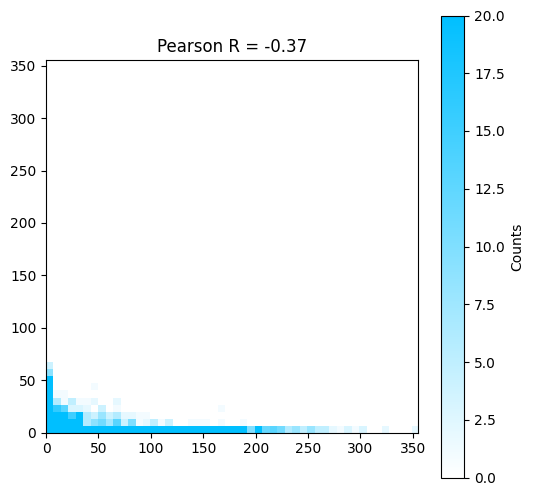

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

df = openFISH.to_df(layer='counts_corrected')

# fig, ax = plt.subplots(figsize = (3,3))
g1 = 'Slc17a7'
g2 = 'Gad2'
tmp = df.loc[:, [g1, g2]].copy()
tmp = tmp[tmp[g1] + tmp[g2] > 0]

# Sample data
# np.random.seed(42)
x = tmp[g1]
y = tmp[g2]
heatmap, xedges, yedges = np.histogram2d(x, y, bins=[50,10])

# Parameters
original_vmin, original_vmax = 0, 20
new_vmin = 0

# Step 1: Create the original colormap (white -> red)
colors = [(1, 1, 1), hex_to_rgb('#00BFFF')]  # white to red
original_cmap = LinearSegmentedColormap.from_list("original_cmap", colors)

# Step 2: Extract the color at new_vmin (10) in the original scale
norm = plt.Normalize(original_vmin, original_vmax)
c = original_cmap(norm(new_vmin))  # RGB color at value=10

# Step 3: Create a new colormap starting from this color (c -> red)
new_colors = [c, hex_to_rgb('#00BFFF')]  # c to red
new_cmap = LinearSegmentedColormap.from_list("new_cmap", new_colors)
new_cmap.set_under('none', alpha=0)  # Make values < new_vmin transparent

# Plot
plt.figure(figsize=(6, 6))
img = plt.imshow(
    heatmap.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap=new_cmap,
    vmin=new_vmin,  # Values < 10 become transparent
    vmax=original_vmax  # 50 remains red
)

max_limit = max(np.max(x), np.max(y))
# Set the same x and y limits
plt.xlim(0, max_limit)
plt.ylim(0, max_limit)

correlation = tmp.corr(method='pearson').iloc[0, 1]
# .set_title(f'Pearson R = {correlation:.2f}')
plt.colorbar(img, label='Counts')
plt.title(f'Pearson R = {correlation:.2f}')

plt.savefig("Rep2_MutualExclusive.pdf", dpi = 300)
plt.show()

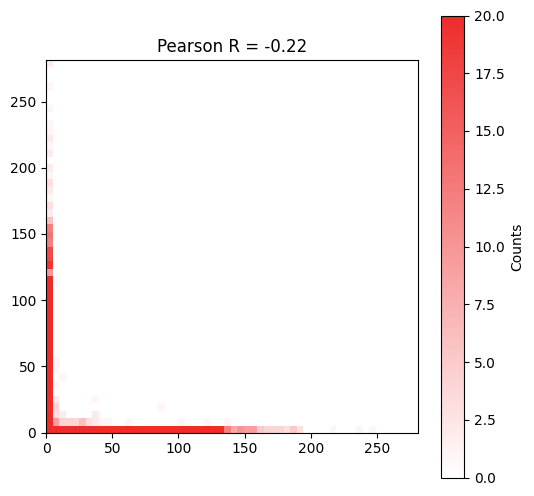

In [50]:
df = scref.to_df()

# fig, ax = plt.subplots(figsize = (3,3))
g1 = 'Slc17a7'
g2 = 'Gad2'
tmp = df.loc[:, [g1, g2]].copy()
tmp = tmp[tmp[g1] + tmp[g2] > 0]

# Sample data
# np.random.seed(42)
x = tmp[g1]
y = tmp[g2]
heatmap, xedges, yedges = np.histogram2d(x, y, bins=[50,50])

# Parameters
original_vmin, original_vmax = 0, 20
new_vmin = 0

# Step 1: Create the original colormap (white -> red)
colors = [(1, 1, 1), hex_to_rgb('#EE2C2C')]  # white to red
original_cmap = LinearSegmentedColormap.from_list("original_cmap", colors)

# Step 2: Extract the color at new_vmin (10) in the original scale
norm = plt.Normalize(original_vmin, original_vmax)
c = original_cmap(norm(new_vmin))  # RGB color at value=10

# Step 3: Create a new colormap starting from this color (c -> red)
new_colors = [c, hex_to_rgb('#EE2C2C')]  # c to red
new_cmap = LinearSegmentedColormap.from_list("new_cmap", new_colors)
new_cmap.set_under('none', alpha=0)  # Make values < new_vmin transparent

# Plot
plt.figure(figsize=(6, 6))
img = plt.imshow(
    heatmap.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap=new_cmap,
    vmin=new_vmin,  # Values < 10 become transparent
    vmax=original_vmax  # 50 remains red
)

max_limit = max(np.max(x), np.max(y))
# Set the same x and y limits
plt.xlim(0, max_limit)
plt.ylim(0, max_limit)

correlation = tmp.corr(method='pearson').iloc[0, 1]
# .set_title(f'Pearson R = {correlation:.2f}')
plt.colorbar(img, label='Counts')
plt.title(f'Pearson R = {correlation:.2f}')

plt.savefig("scRNAseq_MutualExclusive.pdf", dpi = 300)
plt.show()

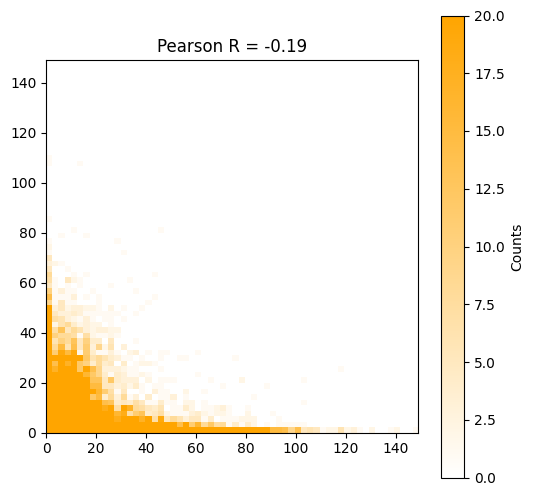

In [54]:
df = xenium.to_df(layer = 'counts')

# fig, ax = plt.subplots(figsize = (3,3))
g1 = 'Slc17a7'
g2 = 'Gad2'
tmp = df.loc[:, [g1, g2]].copy()
tmp = tmp[tmp[g1] + tmp[g2] > 0]

# Sample data
# np.random.seed(42)
x = tmp[g1]
y = tmp[g2]
heatmap, xedges, yedges = np.histogram2d(x, y, bins=[60,50])

# Parameters
original_vmin, original_vmax = 0, 20
new_vmin = 0

# Step 1: Create the original colormap (white -> red)
colors = [(1, 1, 1), hex_to_rgb('#FFA500')]  # white to red
original_cmap = LinearSegmentedColormap.from_list("original_cmap", colors)

# Step 2: Extract the color at new_vmin (10) in the original scale
norm = plt.Normalize(original_vmin, original_vmax)
c = original_cmap(norm(new_vmin))  # RGB color at value=10

# Step 3: Create a new colormap starting from this color (c -> red)
new_colors = [c, hex_to_rgb('#FFA500')]  # c to red
new_cmap = LinearSegmentedColormap.from_list("new_cmap", new_colors)
new_cmap.set_under('none', alpha=0)  # Make values < new_vmin transparent

# Plot
plt.figure(figsize=(6, 6))
img = plt.imshow(
    heatmap.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap=new_cmap,
    vmin=new_vmin,  # Values < 10 become transparent
    vmax=original_vmax  # 50 remains red
)

max_limit = max(np.max(x), np.max(y))
# Set the same x and y limits
plt.xlim(0, max_limit)
plt.ylim(0, max_limit)

correlation = tmp.corr(method='pearson').iloc[0, 1]
# .set_title(f'Pearson R = {correlation:.2f}')
plt.colorbar(img, label='Counts')
plt.title(f'Pearson R = {correlation:.2f}')

plt.savefig("xenium_MutualExclusive.pdf", dpi = 300)
plt.show()

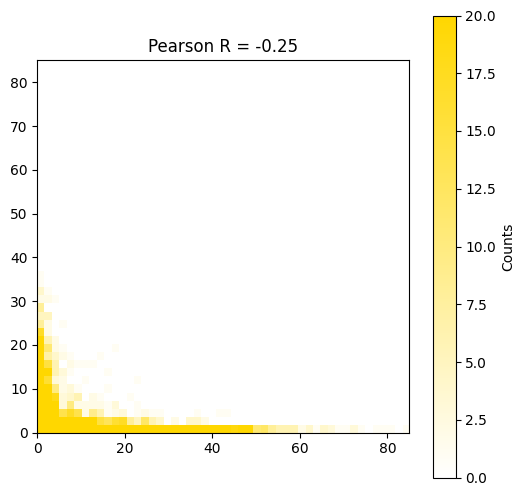

In [58]:
df = xeniumprime.to_df()

# fig, ax = plt.subplots(figsize = (3,3))
g1 = 'Slc17a7'
g2 = 'Gad2'
tmp = df.loc[:, [g1, g2]].copy()
tmp = tmp[tmp[g1] + tmp[g2] > 0]

# Sample data
# np.random.seed(42)
x = tmp[g1]
y = tmp[g2]
heatmap, xedges, yedges = np.histogram2d(x, y, bins=[50,20])

# Parameters
original_vmin, original_vmax = 0, 20
new_vmin = 0

# Step 1: Create the original colormap (white -> red)
colors = [(1, 1, 1), hex_to_rgb('#FFD700')]  # white to red
original_cmap = LinearSegmentedColormap.from_list("original_cmap", colors)

# Step 2: Extract the color at new_vmin (10) in the original scale
norm = plt.Normalize(original_vmin, original_vmax)
c = original_cmap(norm(new_vmin))  # RGB color at value=10

# Step 3: Create a new colormap starting from this color (c -> red)
new_colors = [c, hex_to_rgb('#FFD700')]  # c to red
new_cmap = LinearSegmentedColormap.from_list("new_cmap", new_colors)
new_cmap.set_under('none', alpha=0)  # Make values < new_vmin transparent

# Plot
plt.figure(figsize=(6, 6))
img = plt.imshow(
    heatmap.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap=new_cmap,
    vmin=new_vmin,  # Values < 10 become transparent
    vmax=original_vmax  # 50 remains red
)

max_limit = max(np.max(x), np.max(y))
# Set the same x and y limits
plt.xlim(0, max_limit)
plt.ylim(0, max_limit)

correlation = tmp.corr(method='pearson').iloc[0, 1]
# .set_title(f'Pearson R = {correlation:.2f}')
plt.colorbar(img, label='Counts')
plt.title(f'Pearson R = {correlation:.2f}')

plt.savefig("xeniumprime_MutualExclusive.pdf", dpi = 300)
plt.show()

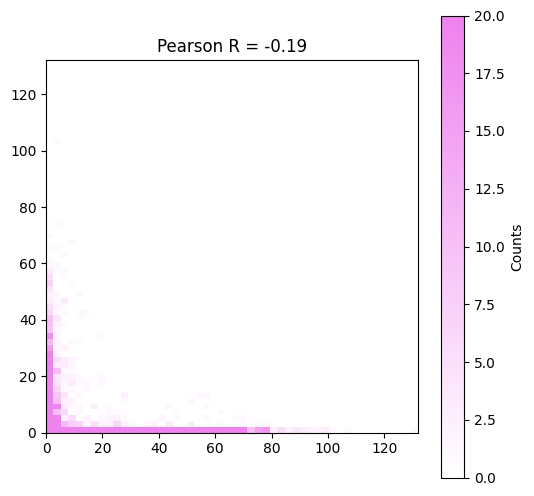

In [61]:
df = merfish.to_df()

# fig, ax = plt.subplots(figsize = (3,3))
g1 = 'Slc17a7'
g2 = 'Gad2'
tmp = df.loc[:, [g1, g2]].copy()
tmp = tmp[tmp[g1] + tmp[g2] > 0]

# Sample data
# np.random.seed(42)
x = tmp[g1]
y = tmp[g2]
heatmap, xedges, yedges = np.histogram2d(x, y, bins=[50,50])

# Parameters
original_vmin, original_vmax = 0, 20
new_vmin = 0

# Step 1: Create the original colormap (white -> red)
colors = [(1, 1, 1), hex_to_rgb('#EE82EE')]  # white to red
original_cmap = LinearSegmentedColormap.from_list("original_cmap", colors)

# Step 2: Extract the color at new_vmin (10) in the original scale
norm = plt.Normalize(original_vmin, original_vmax)
c = original_cmap(norm(new_vmin))  # RGB color at value=10

# Step 3: Create a new colormap starting from this color (c -> red)
new_colors = [c, hex_to_rgb('#EE82EE')]  # c to red
new_cmap = LinearSegmentedColormap.from_list("new_cmap", new_colors)
new_cmap.set_under('none', alpha=0)  # Make values < new_vmin transparent

# Plot
plt.figure(figsize=(6, 6))
img = plt.imshow(
    heatmap.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap=new_cmap,
    vmin=new_vmin,  # Values < 10 become transparent
    vmax=original_vmax  # 50 remains red
)

max_limit = max(np.max(x), np.max(y))
# Set the same x and y limits
plt.xlim(0, max_limit)
plt.ylim(0, max_limit)

correlation = tmp.corr(method='pearson').iloc[0, 1]
# .set_title(f'Pearson R = {correlation:.2f}')
plt.colorbar(img, label='Counts')
plt.title(f'Pearson R = {correlation:.2f}')

plt.savefig("merfish_MutualExclusive.pdf", dpi = 300)
plt.show()

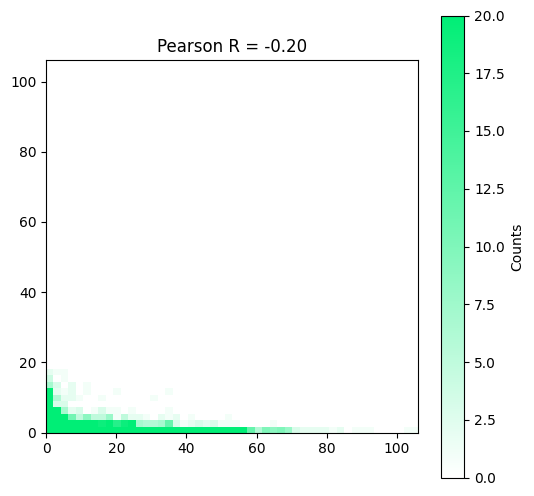

In [75]:
df = starmap.to_df()

# fig, ax = plt.subplots(figsize = (3,3))
g1 = 'SLC17A7'
g2 = 'GAD2'
tmp = df.loc[:, [g1, g2]].copy()
tmp = tmp[tmp[g1] + tmp[g2] > 0]

# Sample data
# np.random.seed(42)
x = tmp[g1]
y = tmp[g2]
heatmap, xedges, yedges = np.histogram2d(x, y, bins=[50,10])

# Parameters
original_vmin, original_vmax = 0, 20
new_vmin = 0

# Step 1: Create the original colormap (white -> red)
colors = [(1, 1, 1), hex_to_rgb('#00EE76')]  # white to red
original_cmap = LinearSegmentedColormap.from_list("original_cmap", colors)

# Step 2: Extract the color at new_vmin (10) in the original scale
norm = plt.Normalize(original_vmin, original_vmax)
c = original_cmap(norm(new_vmin))  # RGB color at value=10

# Step 3: Create a new colormap starting from this color (c -> red)
new_colors = [c, hex_to_rgb('#00EE76')]  # c to red
new_cmap = LinearSegmentedColormap.from_list("new_cmap", new_colors)
new_cmap.set_under('none', alpha=0)  # Make values < new_vmin transparent

# Plot
plt.figure(figsize=(6, 6))
img = plt.imshow(
    heatmap.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap=new_cmap,
    vmin=new_vmin,  # Values < 10 become transparent
    vmax=original_vmax  # 50 remains red
)

max_limit = max(np.max(x), np.max(y))
# Set the same x and y limits
plt.xlim(0, max_limit)
plt.ylim(0, max_limit)

correlation = tmp.corr(method='pearson').iloc[0, 1]
# .set_title(f'Pearson R = {correlation:.2f}')
plt.colorbar(img, label='Counts')
plt.title(f'Pearson R = {correlation:.2f}')

plt.savefig("starmap_MutualExclusive.pdf", dpi = 300)
plt.show()

In [1]:
import spatialdata as sd
import spatialdata_plot
import scanpy as sc

/home/duan/miniconda3/envs/sopa/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/duan/miniconda3/envs/sopa/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
sdata = sd.read_zarr("./Rep2/raw_sdata.zarr/")
sdata

SpatialData object, with associated Zarr store: /media/duan/DuanLab_Data/openFISH/ABA110_Demo2/Rep2/raw_sdata.zarr
├── Images
│     └── 'fluorescence': DataArray[cyx] (3, 22309, 14959)
├── Points
│     ├── 'dist_coord': DataFrame with shape: (<Delayed>, 6) (2D points)
│     └── 'raw_coord': DataFrame with shape: (<Delayed>, 6) (2D points)
├── Shapes
│     └── 'MultiModel': GeoDataFrame shape: (56271, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (56271, 110)
with coordinate systems:
    ▸ 'global', with elements:
        fluorescence (Images), dist_coord (Points), raw_coord (Points), MultiModel (Shapes)

In [3]:
len(sdata['dist_coord'])

9670459

In [3]:
from read_roi import read_roi_file

roi = read_roi_file('Rep2/Fig3E.roi')
roi

{'Fig3E': {'type': 'rectangle',
  'left': 5837,
  'top': 3710,
  'width': 183,
  'height': 183,
  'arc_size': 0,
  'name': 'Fig3E',
  'position': 0}}

In [4]:
from spatialdata import bounding_box_query
roi_id = 'Fig3E'

crop0 = lambda x: bounding_box_query(
    x,
    min_coordinate=[roi[roi_id]['left'], roi[roi_id]['top']],
    max_coordinate=[roi[roi_id]['left'] + roi[roi_id]['width'], roi[roi_id]['top'] + roi[roi_id]['height']],
    axes=("x", "y"),
    target_coordinate_system="global",
)

INFO     input has more than 103 categories. Uniform 'grey' color will be used for all categories.                 


/home/duan/miniconda3/envs/sopa/lib/python3.10/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/duan/miniconda3/envs/sopa/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/duan/miniconda3/envs/sopa/lib/python3.10/site-packages/spatialdata/_core/_elements.py:106: UserWarning: Key `dist_coord` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/duan/miniconda3/envs/sopa/lib/python3.10/site-packages/spatialdata_plot/pl/utils.py:781: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_

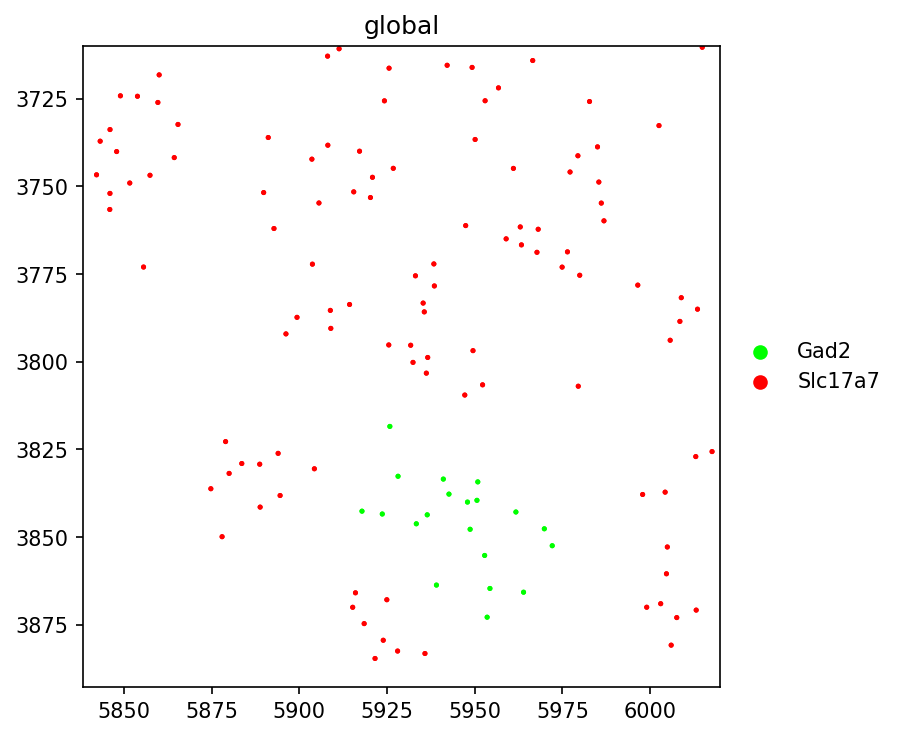

In [5]:
crop0(sdata).pl.render_points('dist_coord', color = 'gene', size=2, palette = ['#00FF00', '#FF0000'], 
                             groups = ['Gad2', 'Slc17a7'], alpha = 1.).pl.show(dpi = 150, save = 'Mutual_Gad2Slc17a7.pdf')
# dpi = 150, save = 'Mutual_Gad2Slc17a7.pdf'